## Notebook 16: Dictionaries and Combining Data sets
The content describing dictionaries was taken from a powerpoint presentation by Sorelle Friedler. \\
Everything else was written by Andrea Lommen, April 2022 and Rachel Langgin, July 2024. \\
The use of pandas "merge" was added in March of 2022.

### For this workbook to work you will need 3 additional files
* Pa_County_Data_2010.csv
* precipitation.csv
* StationIndex.csv

Which are all in the same directory where you got this file.

Let's say you've got a couple data tables that have related information.

I got these from
https://pasdc.hbg.psu.edu/Data/PA-Stats
and
https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00313/html

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount("/content/drive") # this line only has to be run once
dt = pd.read_csv("/content/drive/MyDrive/UNLV/research!/projects/GW_Explorer_A_Beginners_Guide/Beginning_Python_Notebooks/Pa_County_Data_2010.csv")

In [ ]:
dt.head(5)  # Just show the first five rows of the table

,Demographic Profile,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,State and Counties 2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,COUNTY,NAME,Total Population,Population Under 18,Population Age 20-64,Population Age 62 and over,Population Age 65 and over,Median Age,Population of one Race,White Alone,...,"Male householder, no wife present","Male householder, no wife present With own chi...","Female householder, no husband present","Female householder, no husband present With ow...",Non-Family Households,Average Household Size,Average Family Size,Total Occupied Housing Units,Owner-Occupied Housing Units,Renter-Occupied Housing Units
2,NaN,Pennsylvania,12702379,2792155,7563682,2390028,1959307,40.1,12464544,10406288,...,229495,108679,614047,324578,1757597,2.45,3.02,5018904,3491722,1527182
3,001,Adams County,101407,22438,59744,19679,15954,41.3,100063,94979,...,1798,945,3482,1915,10419,2.56,2.97,38013,29368,8645
4,003,Allegheny County,1223348,241663,741975,246288,205059,41.3,1200749,997295,...,20406,8559,65271,33124,225951,2.23,2.91,533960,345393,188567


In [ ]:
# It looks like the table doesn't really start until the 2nd row
# This would look a lot better if we skipped the first two rows
dt = pd.read_csv("/content/drive/MyDrive/UNLV/research!/projects/GW_Explorer_A_Beginners_Guide/Beginning_Python_Notebooks/Pa_County_Data_2010.csv", skiprows=2)

In [ ]:
dt.head(5)

,COUNTY,NAME,Total Population,Population Under 18,Population Age 20-64,Population Age 62 and over,Population Age 65 and over,Median Age,Population of one Race,White Alone,...,"Male householder, no wife present","Male householder, no wife present With own children under 18","Female householder, no husband present","Female householder, no husband present With own children under 18",Non-Family Households,Average Household Size,Average Family Size,Total Occupied Housing Units,Owner-Occupied Housing Units,Renter-Occupied Housing Units
0,NaN,Pennsylvania,12702379,2792155,7563682,2390028,1959307,40.1,12464544,10406288,...,229495,108679,614047,324578,1757597,2.45,3.02,5018904,3491722,1527182
1,1.0,Adams County,101407,22438,59744,19679,15954,41.3,100063,94979,...,1798,945,3482,1915,10419,2.56,2.97,38013,29368,8645
2,3.0,Allegheny County,1223348,241663,741975,246288,205059,41.3,1200749,997295,...,20406,8559,65271,33124,225951,2.23,2.91,533960,345393,188567
3,5.0,Armstrong County,68941,14189,40532,15284,12687,44.5,68413,67565,...,1363,661,2679,1352,9419,2.38,2.88,28713,21668,7045
4,7.0,Beaver County,170539,34878,99720,37884,31660,44.4,167585,155561,...,3211,1428,8663,4491,24227,2.34,2.88,71383,52335,19048


Reminder:
    
iloc - use when you want to give numbers of columns or rows

loc - use when you want to give the names of columns or rows

In [ ]:
# I only want the first 6 columns or so:
# The iloc syntax is iloc[rows, columns]
# The colon in rows place below just means to take all the rows
dt = dt.iloc[:,0:6]
dt.head(3)

,COUNTY,NAME,Total Population,Population Under 18,Population Age 20-64,Population Age 62 and over
0,NaN,Pennsylvania,12702379,2792155,7563682,2390028
1,1.0,Adams County,101407,22438,59744,19679
2,3.0,Allegheny County,1223348,241663,741975,246288


Ah much better!!!  Don't be afraid to make your tables nicer like that.

In [ ]:
precip = pd.read_csv("/content/drive/MyDrive/UNLV/research!/projects/GW_Explorer_A_Beginners_Guide/Beginning_Python_Notebooks/precipitation.csv")

In [ ]:
precip.head(10)

,STATION,STATION_NAME,DATE,HPCP
0,COOP:368491,STILLWATER DAM PA US,20120201 00:00,999.99
1,COOP:368491,STILLWATER DAM PA US,20120201 01:00,999.99
2,COOP:368491,STILLWATER DAM PA US,20120201 08:00,999.99
3,COOP:368491,STILLWATER DAM PA US,20120201 10:00,999.99
4,COOP:369022,TYRONE PA US,20120121 02:00,0.10
5,COOP:369022,TYRONE PA US,20120121 04:00,0.10
6,COOP:369022,TYRONE PA US,20120121 08:00,0.10
7,COOP:369022,TYRONE PA US,20120121 09:00,0.10
8,COOP:369022,TYRONE PA US,20120121 14:00,0.10
9,COOP:369022,TYRONE PA US,20120123 11:00,0.20


## I want to combine these data
I want to combine these data sets (perhaps I want to see if older people live where
it rains less.)  The problem is that the precipitation data is organized by station, so I need to tell my program which county each of the weather stations is in. A dictionary is a good way to do that.

## Dictionary
A way to map from keys to values.  (Also known as maps.)

key: "algorithm"  (This is what CS people call it.  I think of this either as the field name, or as the word in the dictionary.)

value: "a process or set of rules to be followed in calculations or other problem-solving operations, esp. by a computer."   (This language almost makes sense to me - I think of this as the definition.)

Why is this useful?
* quickly look up values using keys (or quickly look up definitions using words)
* keys to value mappings can be more intuitive for some uses than lists


## Properties of Dictionaries
```
They are unordered.  The dictionary containing:
	key: “first name”	value: “Big”
	key: “last name”	value: “Bird”
Is the same as the dictionary:
	key: “last name”	value: “Bird”
	key: “first name”	value: “Big”

There can only be one value associated with any key.
Any later value inserted with the same key replaces the old value.
```

We used () for tuples, and [] for lists.  Haven't you been wondering what we use {} for??  (That was kind of a joke.)

In [ ]:
## Creating a Dictionary in Python

# Making a dictionary:
# empty dictionary: {}   <- notice those are curly braces while lists use square bracket
# initialization:
class_dict = { 'juniors' : 2022, 'seniors' : 2021 }

# (junior is key, 2022 is a value)

# Keys are allowed to be strings or numbers.
# Values can be any type (any object - a data table, a list, another dictionary)

# Getting a value in a dictionary:
graduation_year = class_dict['juniors']
graduation_year

2022

In [ ]:
class_dict

{'juniors': 2022, 'seniors': 2021}

In [ ]:
# The number of key:value pairs in a dictionary:
len(class_dict)

2

Do you see why this might be useful for my fake project?  I want to look up the
county for each station.  So the station names will be my keys.  And the county for
each of them will be the value.  Let's just do it for 3 of them, especially since this is a fake project.

In [ ]:
station_dict = { 'THREE SPRING' : 'Armstrong', 'BUTLER' : 'Allegheny', 'BLAIN': 'Luzerne County' }

Let's see if it worked.

In [ ]:
station_dict['THREE SPRING']

'Armstrong'

In [ ]:
# Can look at the whole dictionary this way
station_dict

{'THREE SPRING': 'Armstrong', 'BUTLER': 'Allegheny', 'BLAIN': 'Luzerne County'}

Yay!

## That was the introduction to dictionaires
Now let's try to use it.

Let's use this to create another column in precip data base called "county".

In [ ]:
statInd= pd.read_csv('/content/drive/MyDrive/UNLV/research!/projects/GW_Explorer_A_Beginners_Guide/Beginning_Python_Notebooks/StationIndex.csv')
statInd.head(3)
# Full disclosure: this is a fake list.

,Station,County
0,ALLENTOWN LEHIGH VALLEY INTERNATIONAL AIRPORT ...,Philadelphia County
1,ALVIN R BUSH DAM PA US,Beaver County
2,BELTZVILLE DAM PA US,Washington County


In [ ]:
# Now let's make a dictionary out of it
# (There's a space before County somehow..., so I had to use the
# 'Column name' syntax)
s =list(statInd.Station)
c =list(statInd[' County'])
county_lookup = {s[i]: c[i] for i in range(len(s))}  # Create the dictionary


In [ ]:
# Note about sleuthing out how I found that space
statInd.columns

Index(['Station', ' County'], dtype='object')

In [ ]:
county_lookup['CONNELLSVILLE 2 SSW PA US']

'Fulton County'

Now finally we're in a position to use this dictionary to add a column to our dataframe.
I can't even remember what we were doing.  (I know that for you it looks like I did all
that right the first time, but it took me a couple hours to get the dictionary
working.)

In [ ]:
## Recall that these are the name of our stations:
# I learned a cool method in those couple hours:
# head just lets you look at the first N lines of your data frame
precip.head(6)

,STATION,STATION_NAME,DATE,HPCP
0,COOP:368491,STILLWATER DAM PA US,20120201 00:00,999.99
1,COOP:368491,STILLWATER DAM PA US,20120201 01:00,999.99
2,COOP:368491,STILLWATER DAM PA US,20120201 08:00,999.99
3,COOP:368491,STILLWATER DAM PA US,20120201 10:00,999.99
4,COOP:369022,TYRONE PA US,20120121 02:00,0.10
5,COOP:369022,TYRONE PA US,20120121 04:00,0.10


In [ ]:
# Let's create a list called newcol that will be our county name
newcol=[]   # creates an empty list
for station in precip.STATION_NAME:
    newcol.append(county_lookup[station])
    # print(newcol)

In [ ]:
newcol

['Schuylkill County',
 'Schuylkill County',
 'Schuylkill County',
 'Schuylkill County',
 'Chester County',
 'Chester County',
 'Chester County',
 'Chester County',
 'Chester County',
 'Chester County',
 'Chester County',
 'Chester County',
 'Chester County',
 'Chester County',
 'Chester County',
 'Chester County',
 'Chester County',
 'Chester County',
 'Chester County',
 'Chester County',
 'Chester County',
 'Chester County',
 'Northumberland County',
 'Northumberland County',
 'Northumberland County',
 'Lehigh County',
 'Lehigh County',
 'Cambria County',
 'Cambria County',
 'Cambria County',
 'Cambria County',
 'Cambria County',
 'Venango County',
 'Venango County',
 'Venango County',
 'Venango County',
 'Venango County',
 'Venango County',
 'Venango County',
 'Venango County',
 'Venango County',
 'Venango County',
 'Venango County',
 'Venango County',
 'Venango County',
 'Venango County',
 'Venango County',
 'Venango County',
 'Venango County',
 'Venango County',
 'Venango County',


In [ ]:
# Now I want to add that column to my data frame
precip['County']=newcol   # Creates a new column called "county" and populates
# it with the items in newcol

In [ ]:
# Did it work?  Yay!!
precip.head(15)

,STATION,STATION_NAME,DATE,HPCP,County
0,COOP:368491,STILLWATER DAM PA US,20120201 00:00,999.99,Schuylkill County
1,COOP:368491,STILLWATER DAM PA US,20120201 01:00,999.99,Schuylkill County
2,COOP:368491,STILLWATER DAM PA US,20120201 08:00,999.99,Schuylkill County
3,COOP:368491,STILLWATER DAM PA US,20120201 10:00,999.99,Schuylkill County
4,COOP:369022,TYRONE PA US,20120121 02:00,0.10,Chester County
5,COOP:369022,TYRONE PA US,20120121 04:00,0.10,Chester County
6,COOP:369022,TYRONE PA US,20120121 08:00,0.10,Chester County
7,COOP:369022,TYRONE PA US,20120121 09:00,0.10,Chester County
8,COOP:369022,TYRONE PA US,20120121 14:00,0.10,Chester County
9,COOP:369022,TYRONE PA US,20120123 11:00,0.20,Chester County


In [ ]:
# In our other datatable, creatively named "dt", we only have information on the
# counties.  So we need to "aggregate" precipitation by County.
# Let's use loc.
precip.loc[precip['County']=='Schuylkill County'].head(10)  # conditional statement inside
# square brackets

,STATION,STATION_NAME,DATE,HPCP,County
0,COOP:368491,STILLWATER DAM PA US,20120201 00:00,999.99,Schuylkill County
1,COOP:368491,STILLWATER DAM PA US,20120201 01:00,999.99,Schuylkill County
2,COOP:368491,STILLWATER DAM PA US,20120201 08:00,999.99,Schuylkill County
3,COOP:368491,STILLWATER DAM PA US,20120201 10:00,999.99,Schuylkill County
444,COOP:366889,PHILADELPHIA INTERNATIONAL AIRPORT PA US,20120121 02:00,0.01,Schuylkill County
445,COOP:366889,PHILADELPHIA INTERNATIONAL AIRPORT PA US,20120121 03:00,0.08,Schuylkill County
446,COOP:366889,PHILADELPHIA INTERNATIONAL AIRPORT PA US,20120121 04:00,0.06,Schuylkill County
447,COOP:366889,PHILADELPHIA INTERNATIONAL AIRPORT PA US,20120121 05:00,0.05,Schuylkill County
448,COOP:366889,PHILADELPHIA INTERNATIONAL AIRPORT PA US,20120121 06:00,0.04,Schuylkill County
449,COOP:366889,PHILADELPHIA INTERNATIONAL AIRPORT PA US,20120121 07:00,0.03,Schuylkill County


In [ ]:
# We want to omit the 999.999 columns, because that's where there's no data
precip.loc[(precip['County']=='Schuylkill County')&(precip['HPCP']!=999.99)].head(10)

,STATION,STATION_NAME,DATE,HPCP,County
444,COOP:366889,PHILADELPHIA INTERNATIONAL AIRPORT PA US,20120121 02:00,0.01,Schuylkill County
445,COOP:366889,PHILADELPHIA INTERNATIONAL AIRPORT PA US,20120121 03:00,0.08,Schuylkill County
446,COOP:366889,PHILADELPHIA INTERNATIONAL AIRPORT PA US,20120121 04:00,0.06,Schuylkill County
447,COOP:366889,PHILADELPHIA INTERNATIONAL AIRPORT PA US,20120121 05:00,0.05,Schuylkill County
448,COOP:366889,PHILADELPHIA INTERNATIONAL AIRPORT PA US,20120121 06:00,0.04,Schuylkill County
449,COOP:366889,PHILADELPHIA INTERNATIONAL AIRPORT PA US,20120121 07:00,0.03,Schuylkill County
450,COOP:366889,PHILADELPHIA INTERNATIONAL AIRPORT PA US,20120121 08:00,0.02,Schuylkill County
451,COOP:366889,PHILADELPHIA INTERNATIONAL AIRPORT PA US,20120121 09:00,0.08,Schuylkill County
452,COOP:366889,PHILADELPHIA INTERNATIONAL AIRPORT PA US,20120121 10:00,0.01,Schuylkill County
453,COOP:366889,PHILADELPHIA INTERNATIONAL AIRPORT PA US,20120121 11:00,0.00,Schuylkill County


In [ ]:
# And then we want the sum of the HCPC column
sum(precip.loc[(precip['County']=='Schuylkill County')&(precip['HPCP']!=999.99)].HPCP)
# the "HPCP" at the end of it tells you you want the HPCP column only

3.160000000000002

In [ ]:
# And we want to do that for every county in the dt datatable
# I'll replace the "Schuylkill County" with findcounty
rainfall=[]
for findcounty in dt.NAME:
    rainfall.append(sum(precip.loc[(precip['County']==findcounty)&(precip['HPCP']!=999.99)].HPCP))


In [ ]:
rainfall

[1.4,
 0,
 0,
 0,
 0,
 1.3000000000000003,
 0,
 0,
 0.0,
 1.4000000000000001,
 1.7,
 0.1,
 1.5,
 0,
 0,
 1.7000000000000004,
 1.8000000000000005,
 1.4000000000000001,
 0.6,
 0,
 0.6,
 0,
 2.4000000000000004,
 0,
 0,
 0,
 0,
 2.6500000000000017,
 0,
 0,
 0.7999999999999999,
 0,
 1.4000000000000001,
 0,
 1.9000000000000004,
 0,
 0,
 0,
 0.7999999999999999,
 0,
 1.3,
 0,
 0.6,
 0,
 0,
 0,
 0,
 0,
 0.9999999999999999,
 3.1899999999999977,
 0,
 2.6399999999999992,
 0,
 0.1,
 3.160000000000002,
 0,
 1.5000000000000002,
 0,
 0,
 0,
 3.0000000000000013,
 1.920000000000001,
 0,
 5.1999999999999975,
 1.5000000000000002,
 1.9000000000000006,
 0,
 1.6000000000000003]

In [ ]:
# It put 0's where it couldn't find any idea.
# If this were my real project instead of my fake project, I would need to investigate
# that and decide what to do about counties that reported no rainfall.

# Now I can add this column to my data fram
dt['Rainfall'] = rainfall

In [ ]:
dt.head(10)

,COUNTY,NAME,Total Population,Population Under 18,Population Age 20-64,Population Age 62 and over,Rainfall
0,NaN,Pennsylvania,12702379,2792155,7563682,2390028,1.4
1,1.0,Adams County,101407,22438,59744,19679,0.0
2,3.0,Allegheny County,1223348,241663,741975,246288,0.0
3,5.0,Armstrong County,68941,14189,40532,15284,0.0
4,7.0,Beaver County,170539,34878,99720,37884,0.0
5,9.0,Bedford County,49762,10739,28467,11335,1.3
6,11.0,Berks County,411442,98136,240023,73216,0.0
7,13.0,Blair County,127089,26878,73277,27224,0.0
8,15.0,Bradford County,62622,14238,35803,13608,0.0
9,17.0,Bucks County,625249,143514,376167,113136,1.4


In [ ]:
#. Yay!!!
# Oh and let's just plot percentage of popular over 62 vs rainfall for fun.
# Let's add another column because that was fun
dt['PercentOver62']=dt['Population Age 62 and over']/dt['Total Population'] * 100

In [ ]:
dt

,COUNTY,NAME,Total Population,Population Under 18,Population Age 20-64,Population Age 62 and over,Rainfall,PercentOver62
0,NaN,Pennsylvania,12702379,2792155,7563682,2390028,1.4,18.815594
1,1.0,Adams County,101407,22438,59744,19679,0.0,19.405958
2,3.0,Allegheny County,1223348,241663,741975,246288,0.0,20.132293
3,5.0,Armstrong County,68941,14189,40532,15284,0.0,22.169681
4,7.0,Beaver County,170539,34878,99720,37884,0.0,22.214274
...,...,...,...,...,...,...,...,...
63,125.0,Washington County,207820,42684,122859,44419,5.2,21.373785
64,127.0,Wayne County,52822,10042,31647,12396,1.5,23.467495
65,129.0,Westmoreland County,365169,72611,214675,83587,1.9,22.889950
66,131.0,Wyoming County,28276,6149,16816,5692,0.0,20.130146


In [ ]:
#  Alas they are strings!!
# Let's convert them to ints using the "astype" method
dt['Population Age 62 and over'] = dt['Population Age 62 and over'].astype(int)
dt['Total Population'] = dt['Total Population'].astype(int)

In [ ]:
dt['PercentOver62']=dt['Population Age 62 and over']/dt['Total Population'] * 100

In [ ]:
# Did it work?
# If this were my real project, I would check it out and make sure it was calculation
# what I thought it was calculating.
dt.head(3)

,COUNTY,NAME,Total Population,Population Under 18,Population Age 20-64,Population Age 62 and over,Rainfall,PercentOver62
0,NaN,Pennsylvania,12702379,2792155,7563682,2390028,1.4,18.815594
1,1.0,Adams County,101407,22438,59744,19679,0.0,19.405958
2,3.0,Allegheny County,1223348,241663,741975,246288,0.0,20.132293


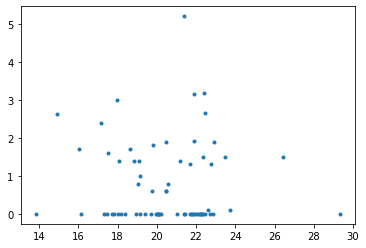

In [ ]:
# Finally we're ready to plot!!
plt.plot(dt.PercentOver62, dt.Rainfall, '.')

In [ ]:
# If this were my real project, I would need to do something thoughtful with the counties where
# there was no rainfall recorded.  In this case I would probably eliminate them from the analysis.

In [ ]:
dt.PercentOver62.corr(dt.Rainfall)

-0.03362082359632469

# Another way to do merge
This works if both of your CSV's happen to have a column in common (say that 5 times fast).

Got this directly from: https://www.statology.org/pandas-merge-on-index/

In [ ]:
#create first DataFrame
df1 = pd.DataFrame({'rating': [90, 85, 82, 88, 94, 90, 76, 75],
                   'points': [25, 20, 14, 16, 27, 20, 12, 15],
                   'number of rebounds': [7, 6, 8, 11, 9, 12, 13, 10]},
                   index=list('abcdefgh'))

print(df1)

   rating  points  number of rebounds
a      90      25                   7
b      85      20                   6
c      82      14                   8
d      88      16                  11
e      94      27                   9
f      90      20                  12
g      76      12                  13
h      75      15                  10


In [ ]:
#create second DataFrame
df2 = pd.DataFrame({'assists': [5, 7, 7, 8, 5, 7],
                   'rebounds': [11, 8, 10, 6, 6, 9]},
                   index=list('acdgmn'))

print(df2)

   assists  rebounds
a        5        11
c        7         8
d        7        10
g        8         6
m        5         6
n        7         9


In [ ]:
pd.merge(df1, df2, left_index=True, right_index=True)

,rating,points,number of rebounds,assists,rebounds
a,90,25,7,5,11
c,82,14,8,7,8
d,88,16,11,7,10
g,76,12,13,8,6


Only the indices that are in both dataframes are kept. That's the default.  If you want it to keep all the columns say how = 'outer'.

In [ ]:
# This does something different (short for concatenate)
# newdf = pd.concat([df1, df2], axis=1)
newdf = pd.merge(df1, df2, left_index=True, right_index=True,how='outer')

In [ ]:
#There are other examples on this page:
#    https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

#For example, I could name the columns I wanted it to merge on.
newdf = pd.merge(df1, df2, left_on="number of rebounds", right_on="rebounds",how='outer')
newdf

,rating,points,number of rebounds,assists,rebounds
0,90,25,7,NaN,NaN
1,85,20,6,8.0,6.0
2,85,20,6,5.0,6.0
3,82,14,8,7.0,8.0
4,88,16,11,5.0,11.0
5,94,27,9,7.0,9.0
6,90,20,12,NaN,NaN
7,76,12,13,NaN,NaN
8,75,15,10,7.0,10.0


## Practice:

In [ ]:
import numpy as np

In [ ]:
# Here's a class called rocket


class Rocket():
    # Rocket simulates a rocket ship for a game,
    #  or a physics simulation.

    def __init__(self, x, y):
        # Each rocket has an (x,y) position.
        self.x = x
        self.y = y

    def move_up(self):
        # Increment the y-position of the rocket.
        self.y += 1

#Add a method to the class called ``move\_down".
    def move_down(self):
        # decrement the y-position of the rocket.
        self.y -= 1

#Bonus: Write a method that calculates the distance between two rockets.
    def get_distance(self, other_rocket):
            dx = self.x - other_rocket.x
            dy = self.y - other_rocket.y
            return (np.sqrt(dx**2 + dy**2))


In [ ]:
#Create two objects in the class Rocket. One that starts at position (3,1) and
#one that starts in position (4,2).
r1 = Rocket(3,1)
r2 = Rocket(4,2)

In [ ]:
r1.x, r1.y

(3, 1)

In [ ]:
# Move the first rocket up three times. Move the second rocket down three times. (You're good at loops
# - do this in a loop!)
for i in range(3):
    r1.move_up()
    r2.move_down()
    print(r1.y, r2.y)


2 1
3 0
4 -1


In [ ]:
# Print the position of each rocket
print ("The position of the first rocket is ", r1.x, r1.y)
print ("The position of the first rocket is ", r2.x, r2.y)

The position of the first rocket is  3 4
The position of the first rocket is  4 -1


In [ ]:
# Use your new method to calculate the distance between the two rockets.
r1.get_distance(r2)

5.0990195135927845

That way of calling a method kinda freaks me out, but I think it's cool at the same time.  It follows the rule of the name of the object (i.e. r1), then a dot, then the name of the method (ie get_distance), and then the argument, but you ignore the "self" arguement, so the only argument is the "other rocket" which is r1.)

In [ ]:
# You really should get the same thing if you call
r2.get_distance(r1)

5.0990195135927845